# 15. 트레이딩 전략을 위한 기술적 지표

이번 장에서는 트레이딩 전략에 대해 알아보도록 하겠습니다. 앞서 종목을 선정하는데 있어 사용되었던 것이 '기본적 분석'이라면, 트레이딩은 과거 주가의 움직임이나 패턴을 통해 주식이 오를지 혹은 내릴지를 판단하는 '기술적 분석'에 의존하는 경우가 많으며, 이러한 판단을 위해 사용되는 것이 기술적 지표입니다. 기술적 지표는 크게 3가지로 나눌 수 있습니다.

1. 트렌드 지표: 추세의 방향이나 강도를 측정하는 지표로써, 대표적으로 **이동평균(Moving Average)** 등이 사용됩니다.
2. 모멘텀 지표: 가격 움직임의 속도를 측정하는 지표로써, **상대강도지수(Relative Strength Index)** 등이 사용됩니다.
3. 변동성 지표: 가격 움직임의 정도를 측정하는 지표로써, **볼린저밴드(Bollinger Bands)** 등이 사용됩니다.

실제로는 셀 수 없을 정도로 많은 종류의 기술적 지표들이 존재합니다. 그러나 이러한 지표들을 맹신해 이를 가지고만 투자하는 것은 매우 위험합니다. 인터넷이나 방송을 보면 과거의 주식 차트와 기술적 지표를 비교하면서, '매수 신호가 발생한 후 지속 상승하여 수익을 거둘 수 있다'며 기술적 지표들을 마치 투자의 절대 법칙인것 처럼 말합니다. 그러나 이러한 지표들은 맞는 때도 있지만 틀리는 때도 수도 없이 많으며, 그들은 이러한 예시를 절대로 보여주지 않습니다. 물론 자산군 단위에서는 기술적 지표가 비교적 잘 맞으므로, 시장 타이밍을 잡을 때는 이를 참고하는 것도 도움이 됩니다. 

기술적 지표를 이용한 트레이딩 전략은 크게 **추세추종전략**과 **평균회귀전략**으로 나눌 수 있습니다. 

1. 추세추종 전략: 주가가 동일한 방향으로 지속될 것이라는데 베팅하며, 이동평균 등의 지표가 사용됩니다.
2. 평균회귀 전략: 주가가 평균으로 다시 회귀하는데 베팅하며, RSI, 볼린저밴드 등의 지표가 사용됩니다.

이번 장에서는 대표적으로 유명한 지표들을 계산하는 방법에 대해 알아보도록 하겠으며, 이러한 지표를 이용한 트레이딩 전략의 실제 효용성에 대해서는 나중 장에서 다시 살펴보도록 하겠습니다.

## 15.1 TA-Lib 패키지 설치하기

각 기술적 지표를 계산하는 수식이 존재하기에 이를 이용해 계산할 수도 있지만, 패키지를 이용한 경우 매우 손쉽게 계산할 수 있습니다. 그 중에서도 기술적 지표 계산에 사용되는 대표적인 패키지는 **TA-Lib** 입니다. 150개 이상의 지표를 계산할 수 있으며, C로 작성되어 있기에 그 속도 또한 매우 빠릅니다. 리눅스 사용자의 경우 보통의 패키지를 설치하는 것과 동일한 방법으로 손쉽게 설치가 가능합니다.

```
pip install ta-lib
```

그러나 윈도우 사용자의 경우 컴파일러가 설치되어 있지 않다면 위 방법을 이용할 시 오류가 발생합니다.

```{figure} image/trading_ins_error.png
---
name: trading_ins_error
---
윈도우에서 TA-Lib 설치시 오류 화면
```

다행히 캘리포니아 대학교 어바인 캠퍼스에서 컴파일러가 없이도 파이썬 라이브러리를 설치할 수 있도록 미리 컴파일된 파이썬 패키지를 제공합니다. 먼저 본인의 파이썬 버젼 및 윈도우 환경을 확인합니다. 프롬프트에서 파이썬에 접속하면 해당 내역이 출력되며, 파이썬 3.8.5 버젼에 윈도우는 64 비트 환경임이 확인됩니다.

```{figure} image/trading_version.png
---
name: trading_version
---
파이썬 및 윈도우 환경 확인
```

그 후 아래의 사이트에서 본인의 버젼에 맞는 파일을 다운로드 합니다. (본인의 버젼은 책과 다를 수 있습니다.)

```
https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib
```

```{figure} image/trading_download.png
---
name: trading_download
---
컴파일 패키지 다운로드
```

마지막으로 프롬프트에서 다운로드 받은 파일이 있는 폴더로 디렉토리를 변경한 후, 아래와 같이 설치합니다. (폴더 내에 다운로드 받은 파일이 있어야 합니다.)

```
cd C:\Users\파일이 있는 폴더
pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl
```

TA-Lib 패키지에서 계산할 수 있는 기술적 지표는 아래 사이트에 자세히 나와있습니다.

```
https://ta-lib.org/function.html
```

## 15.2 이동평균

트렌드 지표 중 가장 대표적인 이동평균을 계산하는 법에 대해 알아보겠습니다. 이동평균은 정해진 기간동안 주식의 평균 가격입니다. 예를 들어 10일간의 이동평균은, 최근 10일간 가격의 평균을 의미합니다. 이 기간이 길수록 장기간의 추세를 나타내며, 짧을수록 단기간의 추세를 나타냅니다. 이동평균은 현재의 추세나 추세 역전, 혹은 저항 수준을 확인할 때 사용됩니다. 흔히 이동평균이 상승하는 상황에서 주가가 그보다 위에 있다면 상승 신호로 여겨집니다. 반대로 이동평균이 하락하는 상황에서 주가가 그보다 아래에 있다면 하락 신호로 여겨집니다.

또한 골든크로스와 데드크로스라는 말을 많이 들어보셨을 겁니다. 골든크로스란 단기 이동평균선이 중장기 이동평균선을 아래에서 위로 뚫고 올라가는 현상으로써 강세신호를 나타내며, 반대로 데드크로스는 단기 이동평균선이 중장기 이동평균선을 위에서 아래로 뚫고 내려가는 현상으로써 약세신호를 나타냅니다.

```{figure} image/trading_cross.png
---
name: trading_cross
---
골든크로스와 데드크로스
```

이동평균을 계산하는 방법은 가격 데이터에 가중치를 얼마나 두냐에 따라 여러가지 방법이 존재하지만, 크게 단순 이동평균과 지수 이동평균이 사용됩니다.

- 단순 이동평균(SMA, Simple Moving Average): 이동평균을 계산할 때 사용되는 가장 일반적인 방법으로써, 단순히 주어진 기간 동안의 종가의 평균을 구합니다.

$$SMA_n = (P_1 + P_2 + \dots + P_n) / n$$

- 지수 이동평균(EMA, Exponential Moving Average): 최근 데이터가 더욱 중요할 수 있으며, 지수 이동평균은 이를 반영하여 각 데이터에 가중치를 다르게 부여한 후 평균을 구합니다.

$$EMA_n = P_n \times 승수 + 이전\ EMA \times (1-승수)$$
$$승수 = 2/(n+1)$$

### 15.2.1 이동평균 계산하기

TA-lib 패키지를 이용해 단순 이동평균과 지수 이동평균을 구해보도록 하겠습니다.

In [67]:
import pandas_datareader as web

stock_data = web.DataReader('^GSPC', 'yahoo')
stock_data = stock_data.tail(500)

먼저 S&P 500 지수(^GSPC) 데이터를 다운로드 받은 후, 최근 500일 데이터만 선택합니다.

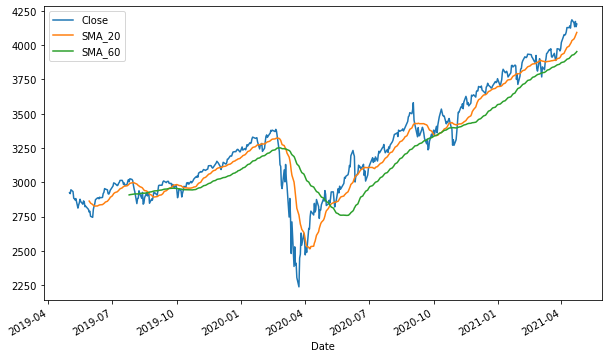

In [16]:
import talib
import matplotlib.pyplot as plt

stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod = 20) # 20일 단순 이동평균
stock_data['SMA_60'] = talib.SMA(stock_data['Close'], timeperiod = 60) # 60일 단순 이동평균
stock_data[['Close', 'SMA_20', 'SMA_60']].plot(figsize = (10, 6))
plt.show()

1. talib 패키지의 `SMA()` 함수를 이용하면 손쉽게 단순 이동평균을 계산할 수 있습니다. 주가에 해당하는 열을 입력한 후, timeperiod에는 얼마의 기간에 해당하는 평균을 계산할지를 입력합니다.
2. 종가, 20일 이동평균, 60일 이동평균에 해당하는 값을 그래프로 나타냅니다.

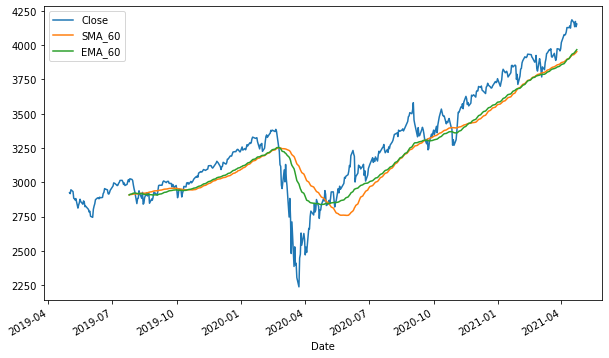

In [18]:
stock_data['EMA_60'] = talib.EMA(stock_data['Close'], 60) # 60일 지수 이동평균
stock_data[['Close', 'SMA_60', 'EMA_60']].plot(figsize = (10, 6))
plt.show()

지수 이동평균 역시 `EMA()` 함수를 통해 쉽게 계산할 수 있습니다. 60일 이동평균을 출력해보면, 지수 이동평균이 최근 데이터에 더 많은 가중치를 부여하기에, 단순 이동평균보다 주가의 움직임에 따라 더욱 민감하게 반응하는 것을 알 수 있습니다.

## 15.3 상대강도지수(RSI)

이번에는 모멘텀 지표 중 대표적인 RSI에 대해 알아보겠습니다. RSI는 일정기간 동안 주가의 상승폭과 하락폭의 크기를 비교해 상승과 하락의 상대적인 강도를 나타낸 지표로써, 다음과 같이 계산됩니다.

1. U(Up): 가격이 상승한 날의 상승폭
2. D(Down): 가격이 하락한 날의 하락폭
3. AU(Average Up)과 AD(Average Down): U값과 D값의 평균을 각각 구함
4. RS(Relative Strenth): AU/AD를 통해 상대강도를 구함

RS 값이 크다는 것은 일정기간 동안 상승한 폭이 하락한 폭보다 크다는 것을 의미하며, RSI는 0에서 100 범위 내에서 움직입니다. 일반적으로 RSI가 70 이상일 경우 과매수 구간으로써 매도할 때를, 30 이하일 경우 과매도 구간으로써 매수해야 할 때로 여겨집니다. 즉 지나친 상승 뒤에는 하락할 것을, 지나친 하락 뒤에는 상승할 것을 기대합니다.

```{figure} image/trading_rsi.png
---
name: trading_rsi
---
RSI 지표
```

### 15.3.1 RSI 계산하기

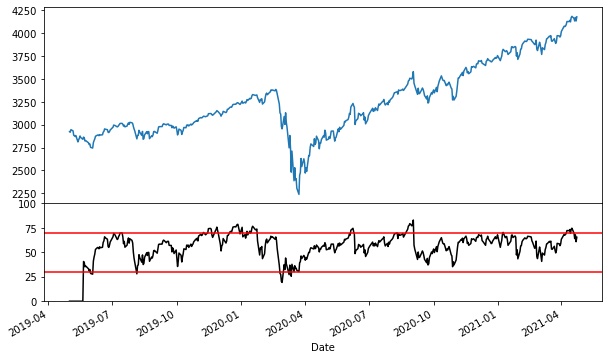

In [71]:
from matplotlib import gridspec

stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod = 14)
stock_data['RSI_14'].fillna(0, inplace=True)
fig = plt.subplots(figsize=(10, 6), sharex=True)
gs = gridspec.GridSpec(nrows = 2, ncols = 1, height_ratios=[2, 1])

# 주가 나타내기
ax1 = plt.subplot(gs[0])
ax1 = stock_data['Close'].plot()
ax1.set_xlabel('')
ax1.axes.xaxis.set_ticks([])

# RSI 나타내기
ax2 = plt.subplot(gs[1])
ax2 = stock_data['RSI_14'].plot(color = 'black', ylim = [0, 100])
ax2.axhline(y=70, color='r', linestyle='-')
ax2.axhline(y=30, color='r', linestyle='-')
ax2.set_xlabel

plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()

1. talib 패키지의 `RSI()` 함수를 이용해 RSI를 계산할 수 있으며, timeperiod는 기간을 의미합니다.
2. `GridSpec()` 함수를 통해 그림을 두 구간으로 나누어 줍니다.
3. 상단에는 주가를 나타냅니다.
4. 하단에는 RSI 및 과매수와 과매도를 의미하는 70과 30 부분에 수평선을 그려줍니다.
5. 두 그림 간 빈칸을 0으로 설정합니다.

RSI 신호에 따라 매매하는 것이 맞을때도 있지만 그렇지 않을때도 있습니다.

## 15.4 볼린저밴드

볼린저밴드는 이동평균선을 중심으로 일정 표준편차를 상한선과 하한선으로 설정한 밴드입니다. 

- 중심 밴드: n 기간 동안의 이동평균
- 상단 밴드: 중심 밴드 기준 k 표준편차 위
- 하단 밴드: 중심 밴드 기준 k 표준편차 아래

```{figure} image/trading_bb.png
---
name: trading_bb
---
볼린저밴드
```

이는 주가의 움직임이 정규분포를 따른다는 가정에 기초합니다. 정규분포에서는 데이터가 1 표준편차 내에 있을 확률이 약 68%, 2 표준편차 내에 있을 확률이 약 95%, 3 표준편차 내에 있을 확률이 약 99% 입니다. 만일 주가가 정규분포를 따른다면, 주가의 움직임은 상한선과 하한선으로 구성된 밴드 내에서만 움직일 확률이 높습니다. 따라서 주가가 상한선 위에 있다는 것은 과매수 상태이므로 하락할 가능성이, 하단선 아래에 있다는 것은 과매도 상태이므로 상승할 가능성이 높습니다.

```{figure} image/trading_norm.png
---
name: trading_norm
---
정규분포에 따른 확률
```

### 15.4.1 볼린저밴드 계산하기

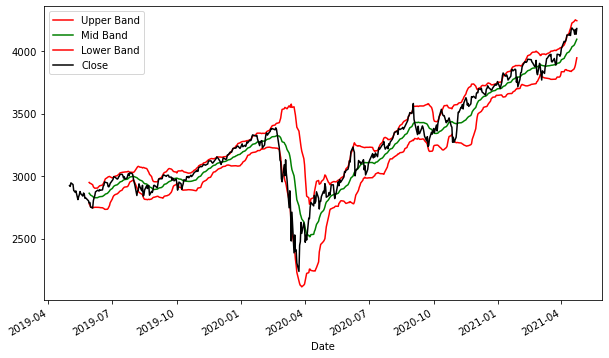

In [120]:
import pandas as pd

upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(stock_data['Close'],
                                             nbdevup = 2,
                                             nbdevdn = 2,
                                             timeperiod = 20)

bb = pd.concat([upper_2sd, mid_2sd, lower_2sd, stock_data['Close']], axis = 1)
bb.columns = ['Upper Band', 'Mid Band', 'Lower Band', 'Close']
bb.plot(figsize=(10, 6), color = {'Upper Band': 'red',
                                  'Lower Band': 'red',
                                  'Mid Band': 'green',
                                  'Close': 'black'})
plt.show()

1. talib 패키지의 `BBANDS()` 함수를 이용해 볼린저 밴드의 상, 중, 하단 값을 계산한 후 각각의 변수에 저장합니다. nbdevup와 nbdevdn는 각각 상단과 하단 밴드를 몇 표준편차 기준으로 계산할지를 의미하며, timeperiod는 이동평균에 계산되는 최근 일수를 의미합니다.
2. 볼린저밴드 값과 종가를 `concat()` 함수를 이용해 하나의 데이터프레임으로 합칩니다.
3. 그래프로 나타내줍니다.

주가가 크게 움직이지 않는 한 2 표준편차로 계산된 밴드 내에서 주가가 움직이는 것이 확인됩니다.